In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

from sklearn.datasets import load_breast_cancer, load_boston, load_iris, load_digits
from sklearn.datasets import make_blobs, make_moons

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVR, SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder    # 전처리에 필요한
from sklearn.preprocessing import OneHotEncoder   # 전처리에 필요한
from sklearn.preprocessing import StandardScaler   # 전처리에 필요한
from sklearn.preprocessing import MinMaxScaler   # 전처리에 필요한

from sklearn.tree import export_graphviz
import graphviz

import mglearn

C:\Users\alcls\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 1. Naive Bayes

+ 조건부 확률을 기반으로 한다.
+ 선형 모델과 유사 (LogisticRegression, LinearSVC, ..)
+ 훈련속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
+ 종류
    - GaussianNB : 연속적인 데이터
    - BernoulliNB : 이산 데이터
    - MultinomialNB : 이산 데이터
+ 하이퍼 파라미터
    - alpha

### (1) GausianNB

In [4]:
# 꽃의 품종을 예측할 때 ( 품종은 3가지 )

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
model = GaussianNB().fit(X_train, y_train)

In [6]:
preds = model.predict(X_test)

In [8]:
print(accuracy_score(y_test, preds))

1.0


In [9]:
confusion_matrix(y_test, preds)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  5]], dtype=int64)

In [10]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### (2) MultinomialNB

+ 영화 리뷰를 이용한 평가 예측(금정 / 부정)

In [34]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [35]:
##### type특성을 숫자로 매핑

df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
df_X = df["movie_review"]
df_y = df["label"]

In [38]:
cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)
encoded_input = X_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [39]:
cv.inverse_transform(encoded_input)                       # inverse_transform  -> 숫자를 문자로

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9'),
 array(['like', 'movie', 'this'], dtype='<U9'),
 array(['amazing', 'in', 'movie', 'this', 'year'], dtype='<U9'),
 array(['also', 'boyfriend', 'cool', 'is', 'movie', 'my', 'said', 'the'],
       dtype='<U9'),
 array(['awesome', 'ever', 'movie', 'of', 'the'], dtype='<U9'),
 array(['and', 'money', 'shame', 'time', 'wasted'], dtype='<U9'),
 array(['director', 'from', 'move', 'movie', 'never', 'on', 'regret',
        'this', 'what', 'will'], dtype='<U9'),
 array(['do', 'like', 'movie', 'not', 'this'], dtype='<U9'),
 array(['actors', 'do', 'in', 'like', 'movie', 'not', 'this'], dtype='<U9'),
 array(['boring', 'movie', 'sleeping'], dtype='<U9')]

In [40]:
print(cv.get_feature_names())
print(encoded_input[0])

['actors', 'again', 'also', 'amazing', 'and', 'awesome', 'boring', 'boyfriend', 'cool', 'director', 'do', 'ever', 'from', 'great', 'in', 'is', 'like', 'money', 'move', 'movie', 'my', 'never', 'not', 'of', 'on', 'regret', 'said', 'shame', 'sleeping', 'the', 'this', 'time', 'wasted', 'watch', 'what', 'will', 'year']
[0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]


C:\Users\alcls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
model = MultinomialNB().fit(X_traincv, df_y)

In [42]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

In [43]:
test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_X = test_df["movie_review"]
test_y = test_df["label"]

In [44]:
X_testcv = cv.transform(test_X)
X_testcv
preds = model.predict(X_testcv)

In [45]:
accuracy_score(test_y, preds)

1.0

### (3) BernoulliNB

+ 스팸 메일

In [47]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]


In [48]:
df = pd.DataFrame(email_list)

In [51]:
df["label"] = df["spam"].map({True:1, False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [52]:
df_X = df["email title"]
df_y = df["label"]

In [53]:
cv = CountVectorizer()
X_traincv = cv.fit_transform(df_X)

In [54]:
model = BernoulliNB().fit(X_traincv, df_y)

In [55]:
test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_X = test_df["email title"]
test_y = test_df["label"]

In [56]:
X_testcv = cv.transform(test_X)
preds = model.predict(X_testcv)

In [57]:
accuracy_score(test_y, preds)

0.8333333333333334

# 2. 인공신경망(Artificial Neural Network)

+ 다층 퍼셉트론 (Multilayer Perceptron, MLP)
+ 비교적 간단한 분류와 회귀에서 사용
+ Feed Forward 신경망, 완전 연결 신경망(Fully Connected Neural Network)

In [58]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz\bin"

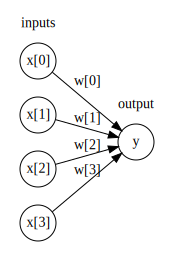

In [59]:
mglearn.plots.plot_logistic_regression_graph()

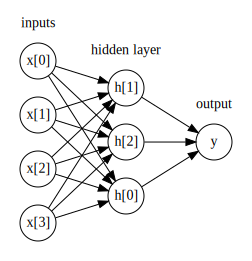

In [60]:
mglearn.plots.plot_single_hidden_layer_graph()

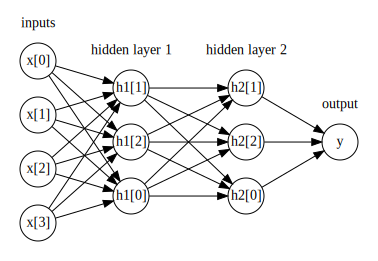

In [61]:
mglearn.plots.plot_two_hidden_layer_graph()

### (1) Perceptron

+ 다수의 신호를 입력으로 받아 하나의 신호를 출력
+ Scikit Learn : Perceptron(), MLPClassifier()
+ ML, DL 프레임워크 : Tensorflow, Pytorch, Keras, Theano, ...

In [143]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [144]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [145]:
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [146]:
preds = model.predict(X_test)

In [147]:
print(accuracy_score(y_test, preds))

0.8222222222222222


### (2) MLPClassifier

In [148]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = MLPClassifier(max_iter=500, hidden_layer_sizes=(200, 200, 200)).fit(X_train, y_train)
model

MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=500)

In [149]:
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))

0.9111111111111111


# 3. Kmeans

+ 군집(Cluster)알고리즘

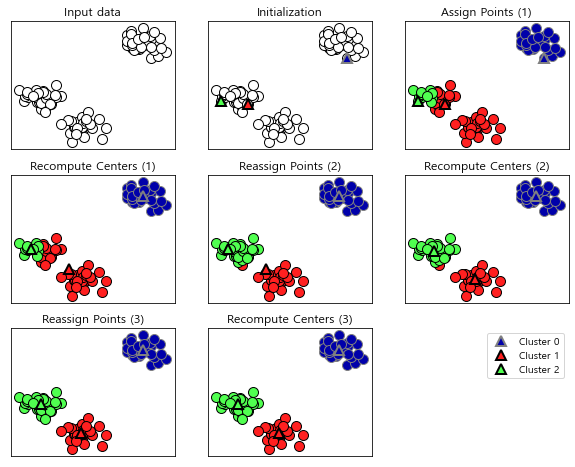

In [150]:
mglearn.plots.plot_kmeans_algorithm()

In [151]:
X, y = make_blobs()

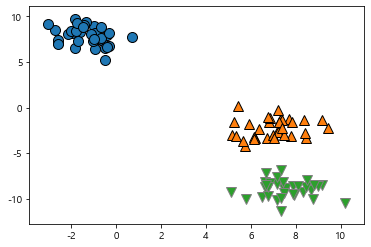

In [152]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [153]:
model = KMeans(n_clusters=4).fit(X)

In [154]:
model.labels_

array([0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 3, 3, 0, 2, 2, 0, 3, 3, 0, 0, 3,
       2, 2, 3, 2, 0, 0, 0, 2, 1, 0, 1, 3, 0, 3, 1, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 3, 3, 0, 0, 0, 3, 2, 2, 2, 1, 3, 3,
       0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 2, 3, 0, 3, 3, 0, 1, 1, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 1, 2])

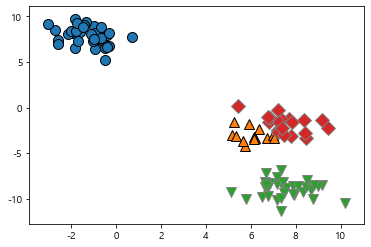

In [155]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_)

In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

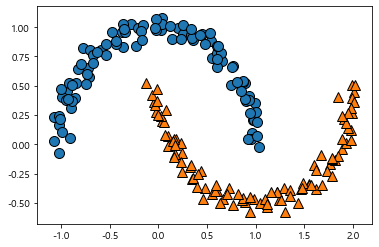

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [4]:
model = KMeans(n_clusters=2).fit(X)

In [5]:
model.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0])

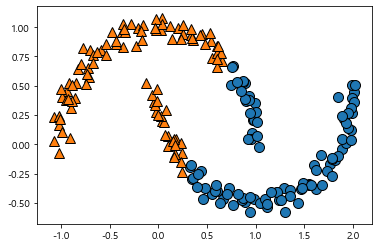

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_)

In [7]:
preds = model.predict(X)
accuracy_score(y, preds)

0.245

In [127]:
iris = load_iris()

model = KMeans(n_clusters=3).fit(iris.data)
model.labels_

accuracy_score(iris.target, model.labels_)

0.8933333333333333

# 4. Titanic 샘플을 이용하여 Kaggle 경연 참가

+ https://www.kaggle.com/c/titanic/

### (1) Prepare Data

In [10]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [12]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### (2) Exploratory Data Analysis

In [14]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [15]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

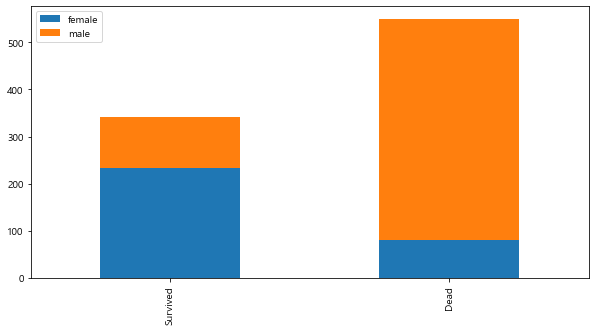

In [16]:
bar_chart("Sex")

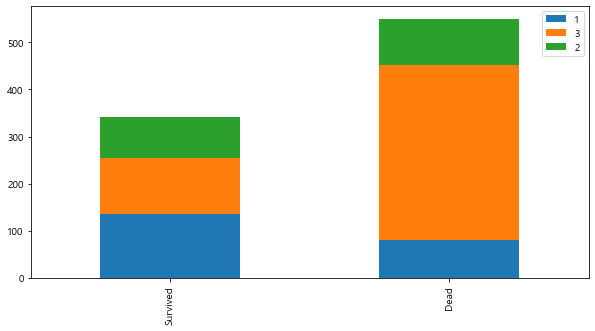

In [17]:
bar_chart("Pclass")

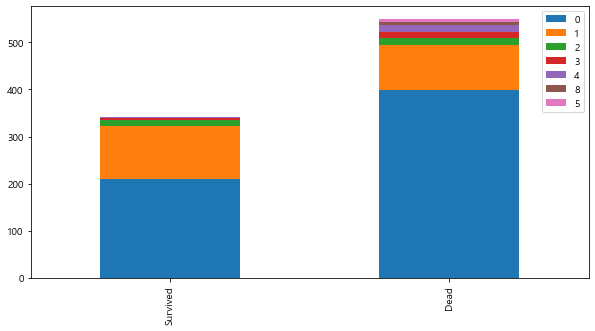

In [18]:
bar_chart("SibSp")

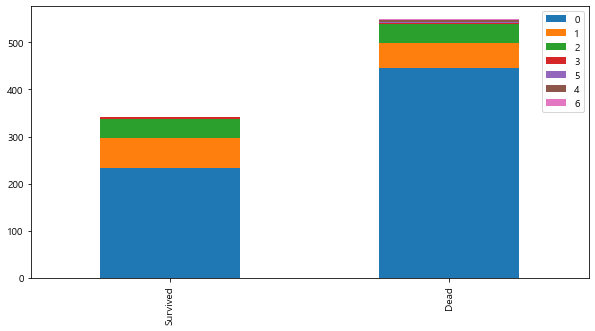

In [19]:
bar_chart("Parch")

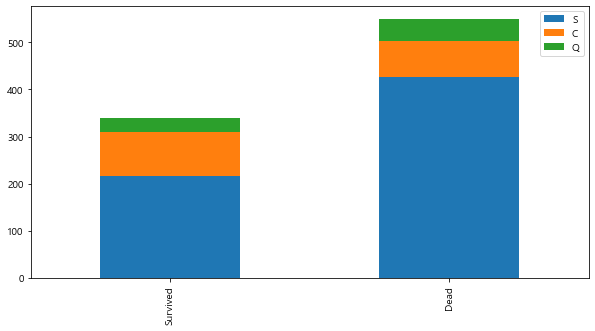

In [20]:
bar_chart("Embarked")

### (3) Feature Engineering

#### 1) Name에서 호칭 추출(Mr, Mrs, Miss)

In [21]:
train_test_data = [train, test]

In [22]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

In [24]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [25]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Mlle":3, "Major":3,
                 "Capt":3, "Mme":3, "Lady":3, "Countess":3, "Don":3, "Jonkheer":3, "Sir":3, "Ms":3,
                "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [27]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


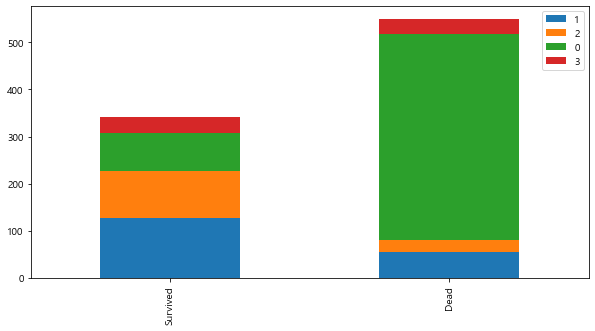

In [28]:
bar_chart("Title")

In [29]:
##### Name 삭제
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [31]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### 2) 결측치 대체와 Binning

+ Binning : child=0, young=1, adult=2, mid=3, senior=4

In [34]:
##### 결측치 처리

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [35]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [36]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [38]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2
